In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import easyocr

In [3]:
pip install easyocr --user

  Using cached easyocr-1.7.1-py3-none-any.whl.metadata (11 kB)
  Using cached opencv_python_headless-4.8.1.78-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached scikit_image-0.22.0-cp311-cp311-win_amd64.whl.metadata (13 kB)
  Using cached imageio-2.32.0-py3-none-any.whl.metadata (4.9 kB)
  Using cached lazy_loader-0.3-py3-none-any.whl.metadata (4.3 kB)
Using cached easyocr-1.7.1-py3-none-any.whl (2.9 MB)
Using cached opencv_python_headless-4.8.1.78-cp37-abi3-win_amd64.whl (38.0 MB)
Using cached scikit_image-0.22.0-cp311-cp311-win_amd64.whl (24.5 MB)
Using cached imageio-2.32.0-py3-none-any.whl (313 kB)
Using cached lazy_loader-0.3-py3-none-any.whl (9.1 kB)
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [3]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='best.pt',force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\User/.cache\torch\hub\master.zip
YOLOv5  2023-11-14 Python-3.11.5 torch-2.1.0+cu118 CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [4]:
results = model('https://i0.wp.com/gomechanic.in/blog/wp-content/uploads/2020/02/gurugram-india_7bc36878-af55-11e8-a206-120fd6da8a0d.jpg?resize=960%2C540&ssl=1')

In [5]:
results.print()

image 1/1: 540x960 4 Number_Plates
Speed: 1950.1ms pre-process, 357.9ms inference, 28.0ms NMS per image at shape (1, 3, 384, 640)


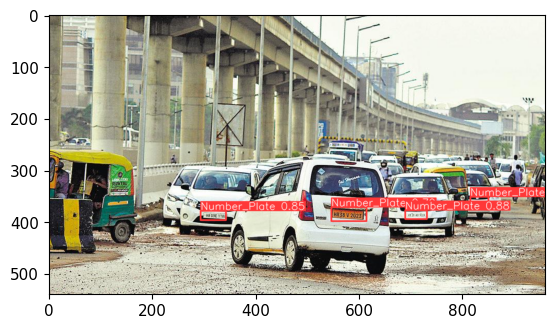

In [6]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [7]:
pred = results.xyxy[0]

In [8]:
np.array(pred)

array([[     689.23,      378.11,      731.71,      395.97,      0.8824,           0],
       [     293.34,      379.33,      342.98,      397.15,     0.84974,           0],
       [     546.16,      372.33,      614.62,      399.39,     0.79254,           0],
       [     815.56,      352.66,      850.03,      369.16,     0.43634,           0]], dtype=float32)

In [9]:
reader = easyocr.Reader(['en'])

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


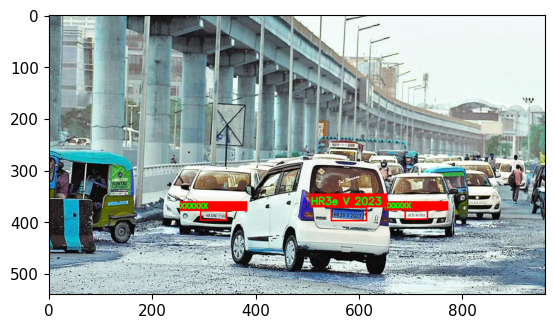

In [71]:
img = Image.open('sample.webp')
results = model(img)
def detect_ocr(img, loc):
    for cor in loc:
        if cor[4] > 0.6:
            top_left = tuple(cor[:2].astype(int))
            bottom_right = tuple(cor[2:4].astype(int))
            cv2.rectangle(img,top_left ,bottom_right , (0,0,255), thickness = 2)
            num_plate = img[top_left[1]:bottom_right[1], top_left[0]:bottom_right[0]]
            result = reader.readtext(num_plate)
            
            num_value = "XXXXXX"
            if len(result) != 0: num_value = result[0][1]
            
                
            cv2.rectangle(img,(top_left[0] - 40 , top_left[1] - abs(top_left[1] - bottom_right[1])) ,
                          (bottom_right[0] + 40,bottom_right[1] - abs(top_left[1] - bottom_right[1])) , (0,0,255), -1)
            cv2.putText(img, num_value , (top_left[0]-40,bottom_right[1] - abs(top_left[1] - bottom_right[1])-5) 
                        , cv2.FONT_HERSHEY_SIMPLEX , 0.025*abs(top_left[1] - bottom_right[1]), (0,255,0) , 2)
    return img 
    
    # cv2.imshow('image', img)

    

ocr_frame = detect_ocr(np.array(img),np.array(results.xyxy[0]))
ocr_frame = cv2.cvtColor(ocr_frame, cv2.COLOR_BGR2RGB)
plt.imshow(ocr_frame)

In [73]:
cap = cv2.VideoCapture('traffic_video.mp4')
cv2.namedWindow('YOLO', cv2.WINDOW_NORMAL)
fps = cap.get(cv2.CAP_PROP_FPS)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

fourcc = cv2.VideoWriter_fourcc(*'XVID')  # Use H264 codec for MP4
output_video_path = 'output_video.mp4'
out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))




while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    # Make detections 
    results = model(frame)

    rendered_frame = detect_ocr(np.array(frame), np.array(results.xyxy[0]))
    
    cv2.imshow('YOLO', rendered_frame)
    # time.sleep(1/24)
    out.write(rendered_frame)
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
out.release()
cv2.destroyAllWindows()

In [38]:
%pwd

'C:\\Users\\User\\Desktop\\Python\\tfod\\Number Plate Detection'